# Healthcare Regulation

## Theory


### Payoff for every survied patient after 1 year of hospitalization (1YM regulation - 1 year mortality)

As in previous article, we will consider 1-D model with 2 hospitals along line with "passive" dispathcer. It means, that if no one hospital want to accept patient, dispatcher distribute patient to closest one. 

Now let modify players payoff functions to foster inter-hospital collaboration for load balancing. For that purpose, we define utility function of hospital as difference between payoff to survived patient and medical expences. This payoff function encourages hospitals to take only those patients whom they can cure.

We will define $P_{m1y}$ as probability of 1-year mortality, depending on time to treatment using https://www.ahajournals.org/doi/10.1161/01.CIR.0000121424.76486.20c

$$ P_{m1y}(t) = 0.000043 \cdot x^2 + 0.0045 \cdot x + 2.86 $$ 

Time to treatment was calculated from symptom onset to first balloon inflation (true ischemic time). It means that time to treatment may calculated as
$$ T_{treatment}(\lambda) = T_{transp}(\lambda) + T_{queue}(\lambda) + T_{surgery} $$
 
Let government revenue for cured patient be $ R_{cured} $.

Medical expences consist of transportation and operation costs.
$$ E_{med} = C_{transp} + C_{op} $$

So modified utility function for hospital will look like:

$$ u_i = \lambda_i \cdot [(1-P_{m1y}(T_{treatment}) \cdot R_{cured} - E_{med}] $$


### Payoff for every survied patient during treatment (D2B regulation - Door-to-balloon)

As in previous case, government will motivate hospitals rewarding for every cured patient. But now cured patient means patient, that survived after hospitalization and treatment. 

We will use table from https://www.bmj.com/content/338/bmj.b1807 and regression to interpolate probability of mortality depending on door-to-balloon time.


![image.png](src/images/regulation/Door-to-balloon time.PNG)

[[ 0.00000000e+00 -2.14727429e-02  4.77004477e-04 -1.09491090e-06]]
[3.21208791]


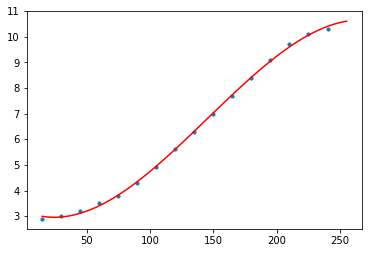

In [54]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

d = 3

x = np.array(np.arange(15, 255, 15))
y = np.array([2.9, 3, 3.2, 3.5, 3.8, 4.3, 4.9, 5.6, 6.3, 7, 7.7, 8.4, 9.1, 9.7, 10.1, 10.3])

x = x[:, np.newaxis]
y = y[:, np.newaxis]

poly_features = PolynomialFeatures(degree=d)

x_poly = poly_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

xs = np.linspace(15, 255, 1000)
xs = xs[:, np.newaxis]
xs_poly = PolynomialFeatures(degree=d).fit_transform(xs)

ys = model.predict(xs_poly)


plt.scatter(x, y, s=10)
plt.plot(xs, ys, color='r')

print(model.coef_)
print(model.intercept_ )

We will define probability of mortality during treatment as $$ P_{mt}(t) = -0.00000109 \cdot t^3 + 0.000477 \cdot t^2 - 0.0021473 \cdot t + 3.212087 $$

It is also necessary to note, that some of patients, delivered to hospital may die during waiting in queue. We take this into account in the model, subtracting from the flow of patients part, that would not have been cured (however, the hospital still has expenses for them).

$$ \lambda_i^{cured} = \lambda_i \cdot (1 - P_{mt}(T_{treatment}(\lambda_i)) $$

The hospital will receive a reward for all cured patients, and spend on operating expenses. Patients who could not be cured by the hospital will also be spent on transportation.

$$ u_i = \lambda_i^{cured} \cdot (R_{cured} - E_{op}) - \lambda_i \cdot E_{op} $$




### Dispatcher Regulation

City Regulation of healthcare were reviewed in [Dispathcer Notebook](Dispatcher Agent.ipynb)

## Results

#### Hospital with D2B regulation

##### Pure Nash Equilibrium 

![image.png](src/images/regulation/Hospital With D2B regulation Nash Equ.png)

##### Mixed Nash Equilibrium
![image.png](src/images/regulation/Hospital With D2B regulation Mixed Nash Equ.png)


#### Hospital with 1YM regulation


##### Pure Nash Equilibrium

![image.png](src/images/regulation/Hospital With 1YM regulation Nash Equ.png)

##### Mixed Nash Equilibrium

![image.png](src/images/regulation/Hospital with 1YM regulation Mixed Nash Equ.png)